In [30]:
import numpy as np
import pandas as pd
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt



In [31]:
df = pd.read_csv("SelectedDF.csv")
df.head(2)

,Unnamed: 0,fund_symbol,fund_short_name,investment_type,size_type,initial_investment,subsequent_investment,fund_category,fund_family,management_name,...,fund_bond_maturity,morningstar_return_rating,fund_return_ytd,fund_return_3years,fund_return_5years,fund_return_10years,environment_score,esg_score,sustainability_rank,governance_score
0,0,AAAAX,DWS RREEF Real Assets Fund - Cl,Value,Large,1000.0,50.0,World Allocation,DWS,John Vojticek,...,NaN,3.0,0.21026,0.13811,0.09078,0.06058,8.42,22.46,31.0,5.43
1,1,AAAEX,AllianzGI Health Sciences Fund,Blend,Large,1000000.0,NaN,Health,Virtus,Christopher Chin,...,NaN,3.0,0.19077,NaN,NaN,NaN,1.42,27.05,51.0,8.40


In [36]:
df.describe()

,Unnamed: 0,initial_investment,subsequent_investment,total_net_assets,year_to_date_return,week52_high,week52_low,fund_yield,morningstar_overall_rating,morningstar_risk_rating,...,fund_bond_maturity,morningstar_return_rating,fund_return_ytd,fund_return_3years,fund_return_5years,fund_return_10years,environment_score,esg_score,sustainability_rank,governance_score
count,23783.000000,2.378300e+04,23783.000000,2.378300e+04,23783.000000,23783.000000,23783.000000,23783.000000,23783.000000,23783.000000,...,23783.000000,23783.000000,23783.000000,23783.000000,23783.000000,23783.000000,23783.000000,23783.000000,23783.000000,23783.000000
mean,11891.000000,3.589909e+06,382.013371,4.917153e+09,0.093485,24.995830,20.352340,0.017481,3.103340,3.069121,...,7.504512,3.096332,0.093610,0.101469,0.081893,0.080488,3.633445,23.767634,51.141884,6.210819
std,6865.705062,7.707717e+07,6777.647178,2.108338e+10,0.081580,34.995656,26.473466,0.021854,1.040479,1.063456,...,2.432694,1.048586,0.081514,0.067644,0.047521,0.041166,1.791179,2.411781,21.717421,2.252794
min,0.000000,0.000000e+00,0.000000,0.000000e+00,-0.522800,1.700000,1.150000,0.000100,1.000000,1.000000,...,0.000000,1.000000,-0.522800,-0.512700,-0.429600,-0.408200,0.000000,8.250000,0.000000,0.000000
25%,5945.500000,0.000000e+00,0.000000,1.425418e+08,0.027100,11.400000,10.470000,0.008800,2.000000,2.000000,...,7.504512,2.000000,0.027300,0.059800,0.056200,0.074200,3.600000,22.910000,41.000000,6.210819
50%,11891.000000,1.000000e+03,0.000000,6.428231e+08,0.093485,15.810000,13.350000,0.017481,3.000000,3.000000,...,7.504512,3.000000,0.093610,0.101469,0.081893,0.080488,3.633445,23.767634,51.141884,6.210819
75%,17836.500000,1.500000e+04,50.000000,2.445104e+09,0.148700,26.450000,21.450000,0.019200,4.000000,4.000000,...,7.504512,4.000000,0.148700,0.128900,0.098500,0.082500,4.180000,23.870000,62.000000,7.520000
max,23782.000000,5.000000e+09,500000.000000,7.534100e+11,0.578900,2092.820000,1637.070000,1.258500,5.000000,5.000000,...,28.610000,5.000000,0.578900,0.648240,0.448580,0.398600,17.920000,41.210000,100.000000,14.020000


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23783 entries, 0 to 23782
Data columns (total 52 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Unnamed: 0                                23783 non-null  int64  
 1   fund_symbol                               23783 non-null  object 
 2   fund_short_name                           22959 non-null  object 
 3   investment_type                           22674 non-null  object 
 4   size_type                                 22674 non-null  object 
 5   initial_investment                        23783 non-null  float64
 6   subsequent_investment                     23783 non-null  float64
 7   fund_category                             23120 non-null  object 
 8   fund_family                               23783 non-null  object 
 9   management_name                           23783 non-null  object 
 10  total_net_assets                  

In [32]:
# List of columns for which you want to fill null values with the mean
columns_to_fill = ['fund_yield', 'morningstar_overall_rating', 'morningstar_risk_rating', 'annual_holdings_turnover',
                    'fund_annual_report_net_expense_ratio', 'category_annual_report_net_expense_ratio',
                    'fund_year3_expense_projection', 'fund_year5_expense_projection', 'fund_year10_expense_projection',
                    'asset_cash', 'fund_sector_basic_materials', 'fund_sector_utilities', 'fund_sector_technology',
                    'fund_sector_real_estate', 'fund_sector_industrials', 'fund_sector_healthcare',
                    'fund_sector_financial_services', 'fund_sector_energy', 'fund_sector_consumer_defensive',
                    'fund_sector_consumer_cyclical', 'fund_sector_communication_services', 'fund_price_earning_ratio',
                    'fund_price_sales_ratio', 'fund_year3_earnings_growth', 'fund_bond_maturity',
                    'morningstar_return_rating', 'fund_return_ytd', 'fund_return_3years', 'fund_return_5years',
                    'fund_return_10years', 'environment_score', 'esg_score', 'sustainability_rank', 'governance_score']

# Fill null values in the specified columns with the mean
df[columns_to_fill] = df[columns_to_fill].fillna(df[columns_to_fill].mean())


In [ ]:

# Columns to fill with mean
mean_fill_columns = ['year_to_date_return','week52_high','week52_low','morningstar_overall_rating','morningstar_risk_rating','annual_holdings_turnover','investment_type.1','size_type.1','fund_annual_report_net_expense_ratio','category_annual_report_net_expense_ratio','fund_year3_expense_projection','fund_year5_expense_projection','fund_price_earning_ratio','fund_price_sales_ratio','fund_year3_earnings_growth','fund_return_ytd','morningstar_return_rating','fund_yield', 'fund_return_3years', 'fund_return_5years', 'fund_return_10years', 'environment_score', 'esg_score', 'sustainability_rank', 'governance_score']

# Columns to fill with 0
zero_fill_columns = ['asset_cash','initial_investment', 'subsequent_investment', 'fund_bond_maturity', 'total_net_assets']

# Fill null values with mean
df[mean_fill_columns] = df[mean_fill_columns].fillna(df[mean_fill_columns].mean())

# Fill null values with 0
df[zero_fill_columns] = df[zero_fill_columns].fillna(0)

df.head(2)


# Drop specified columns
df2 = df.drop(['fund_symbol', 'fund_short_name', 'fund_category', 'fund_family', 'investment_type','size_type','investment_strategy', 'management_name', 'fund_sector_basic_materials', 'fund_sector_utilities', 'fund_sector_technology', 'fund_sector_real_estate', 'fund_sector_industrials', 'fund_sector_healthcare', 'size_type.1','fund_sector_financial_services', 'fund_sector_energy', 'fund_sector_consumer_defensive', 'inception_date','fund_sector_consumer_cyclical', 'investment_type.1','fund_sector_communication_services'], axis=1)


df2.head(10)

#df2.to_csv("LogisticRegDF2.csv")





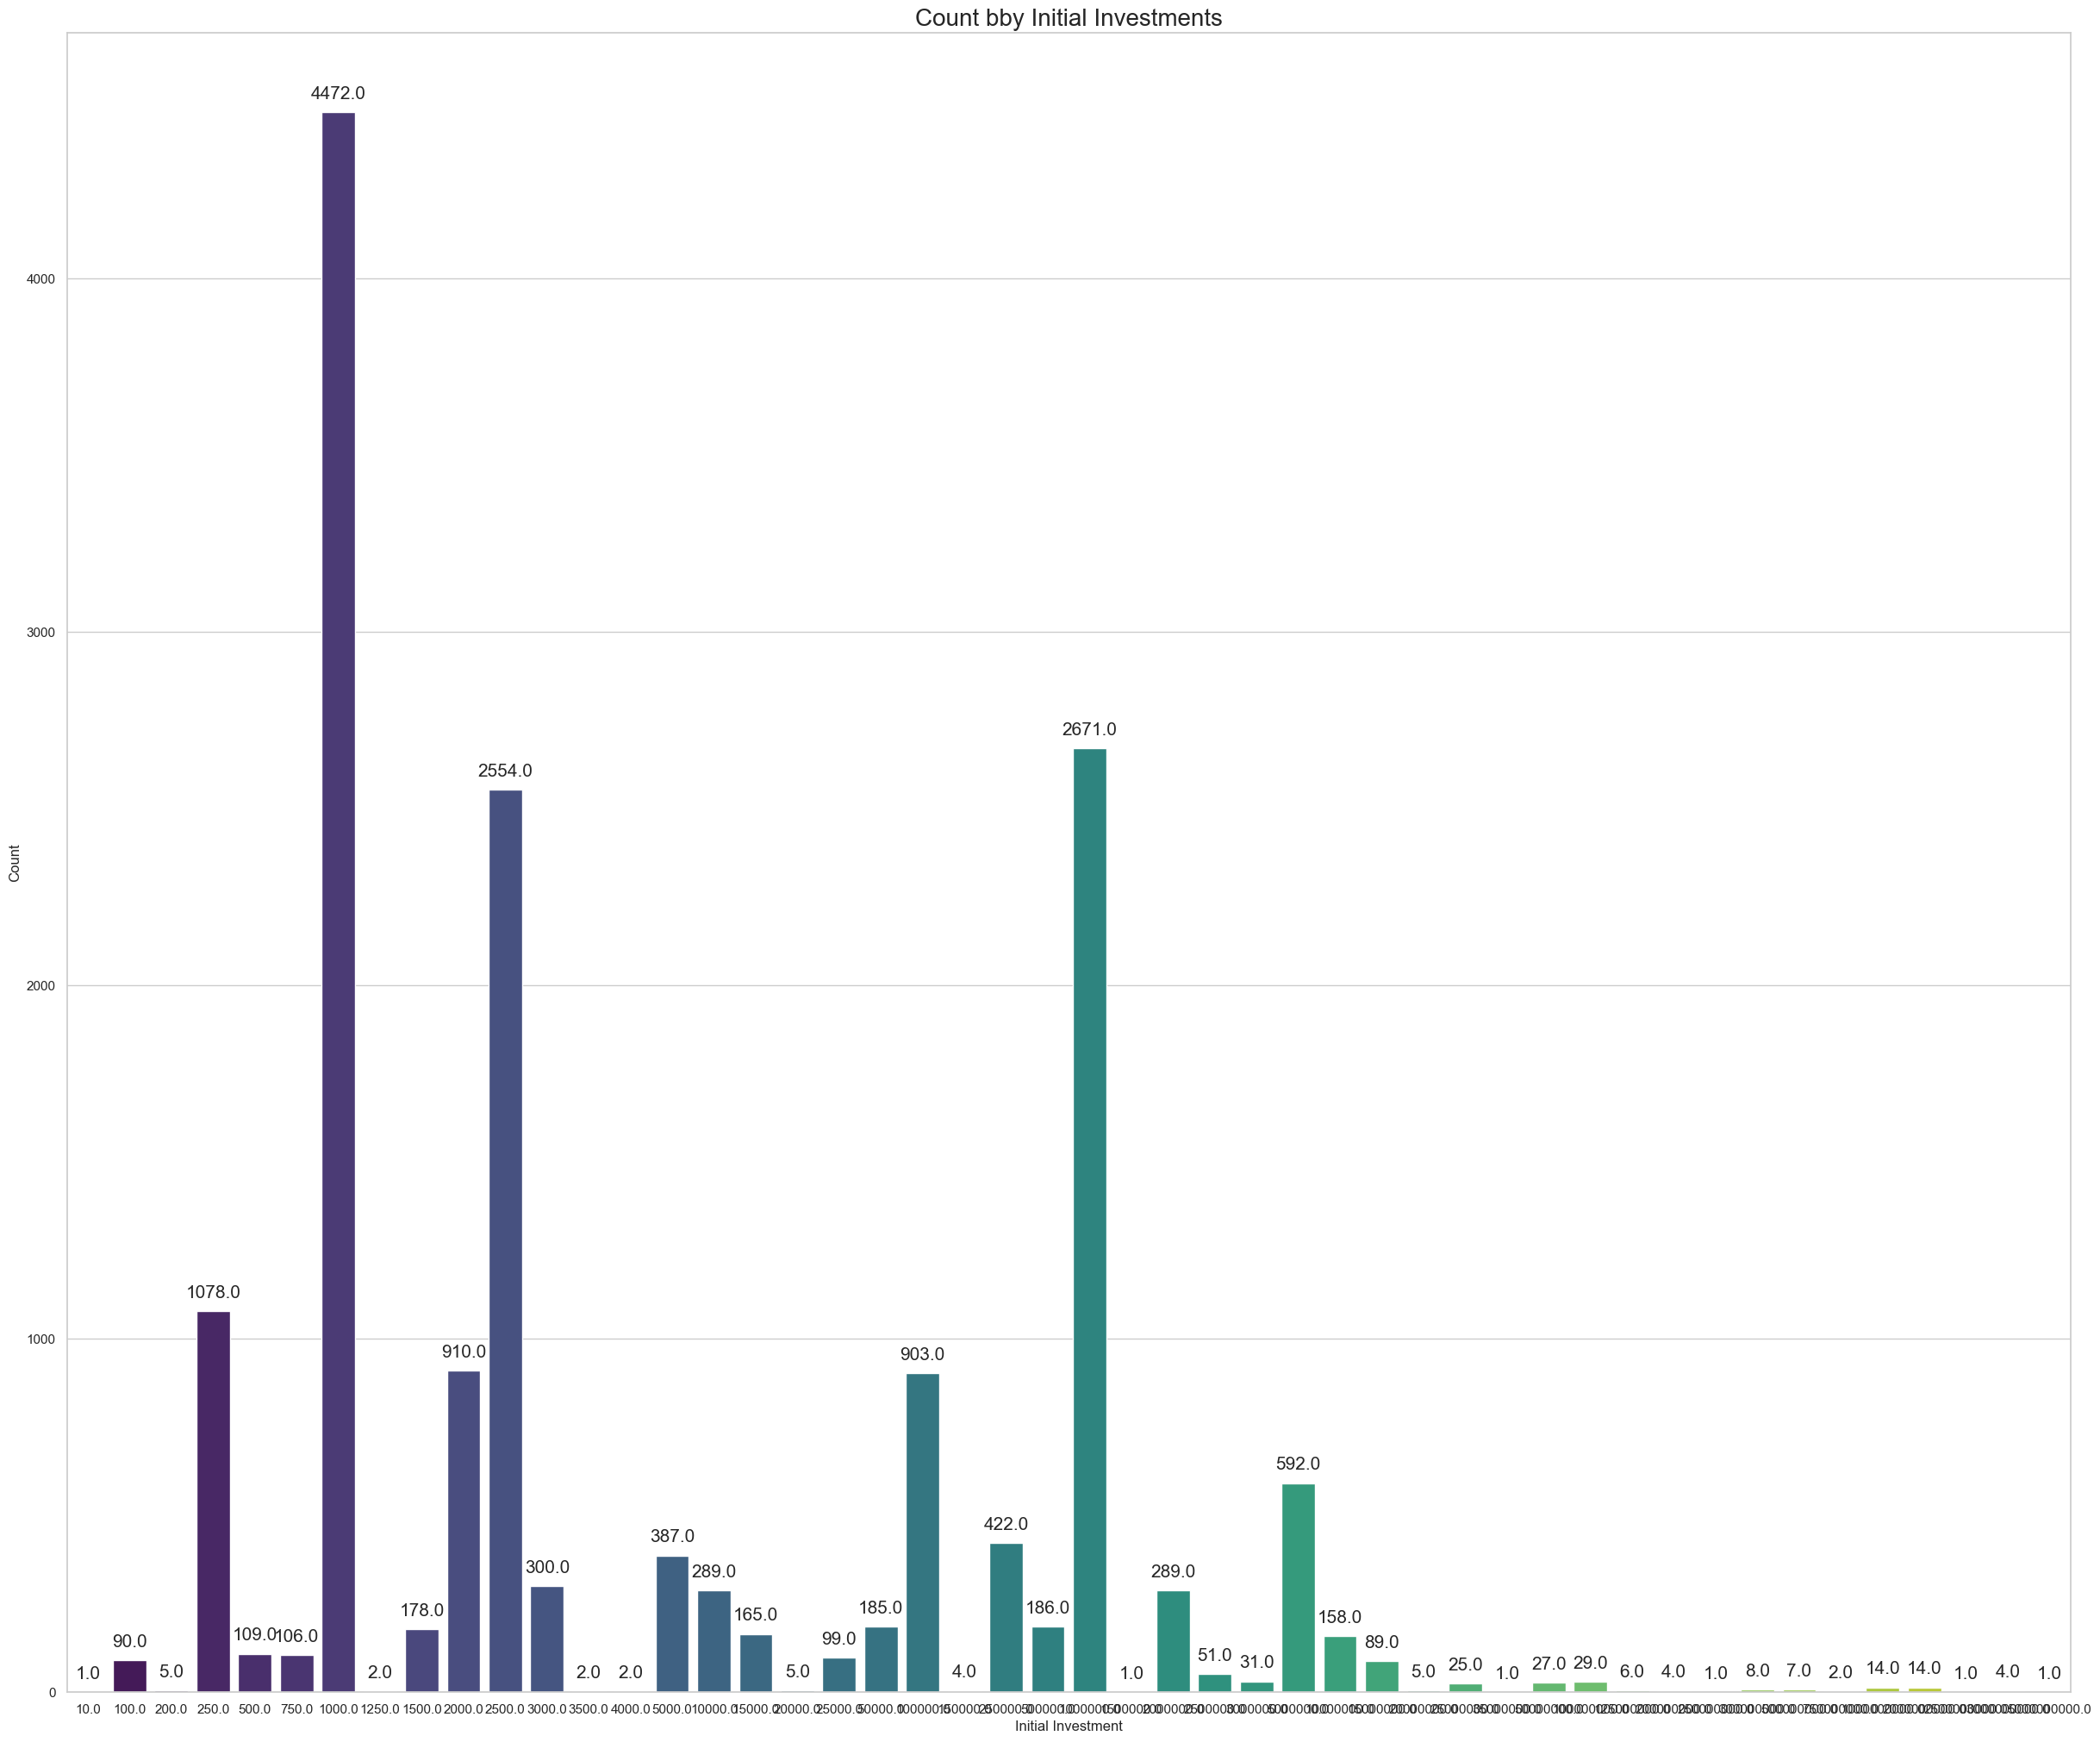

In [57]:
plt.figure(figsize=(30, 25))
ax = sns.countplot(x='initial_investment', data=df2[df2['initial_investment'] > 0.0], palette='viridis')

# Add count values on top of each bar with increased font size
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 15), textcoords='offset points', fontsize=15)

plt.xlabel('Initial Investment')
plt.ylabel('Count')
plt.title("Count by Initial Investments",fontsize=20)
plt.show()


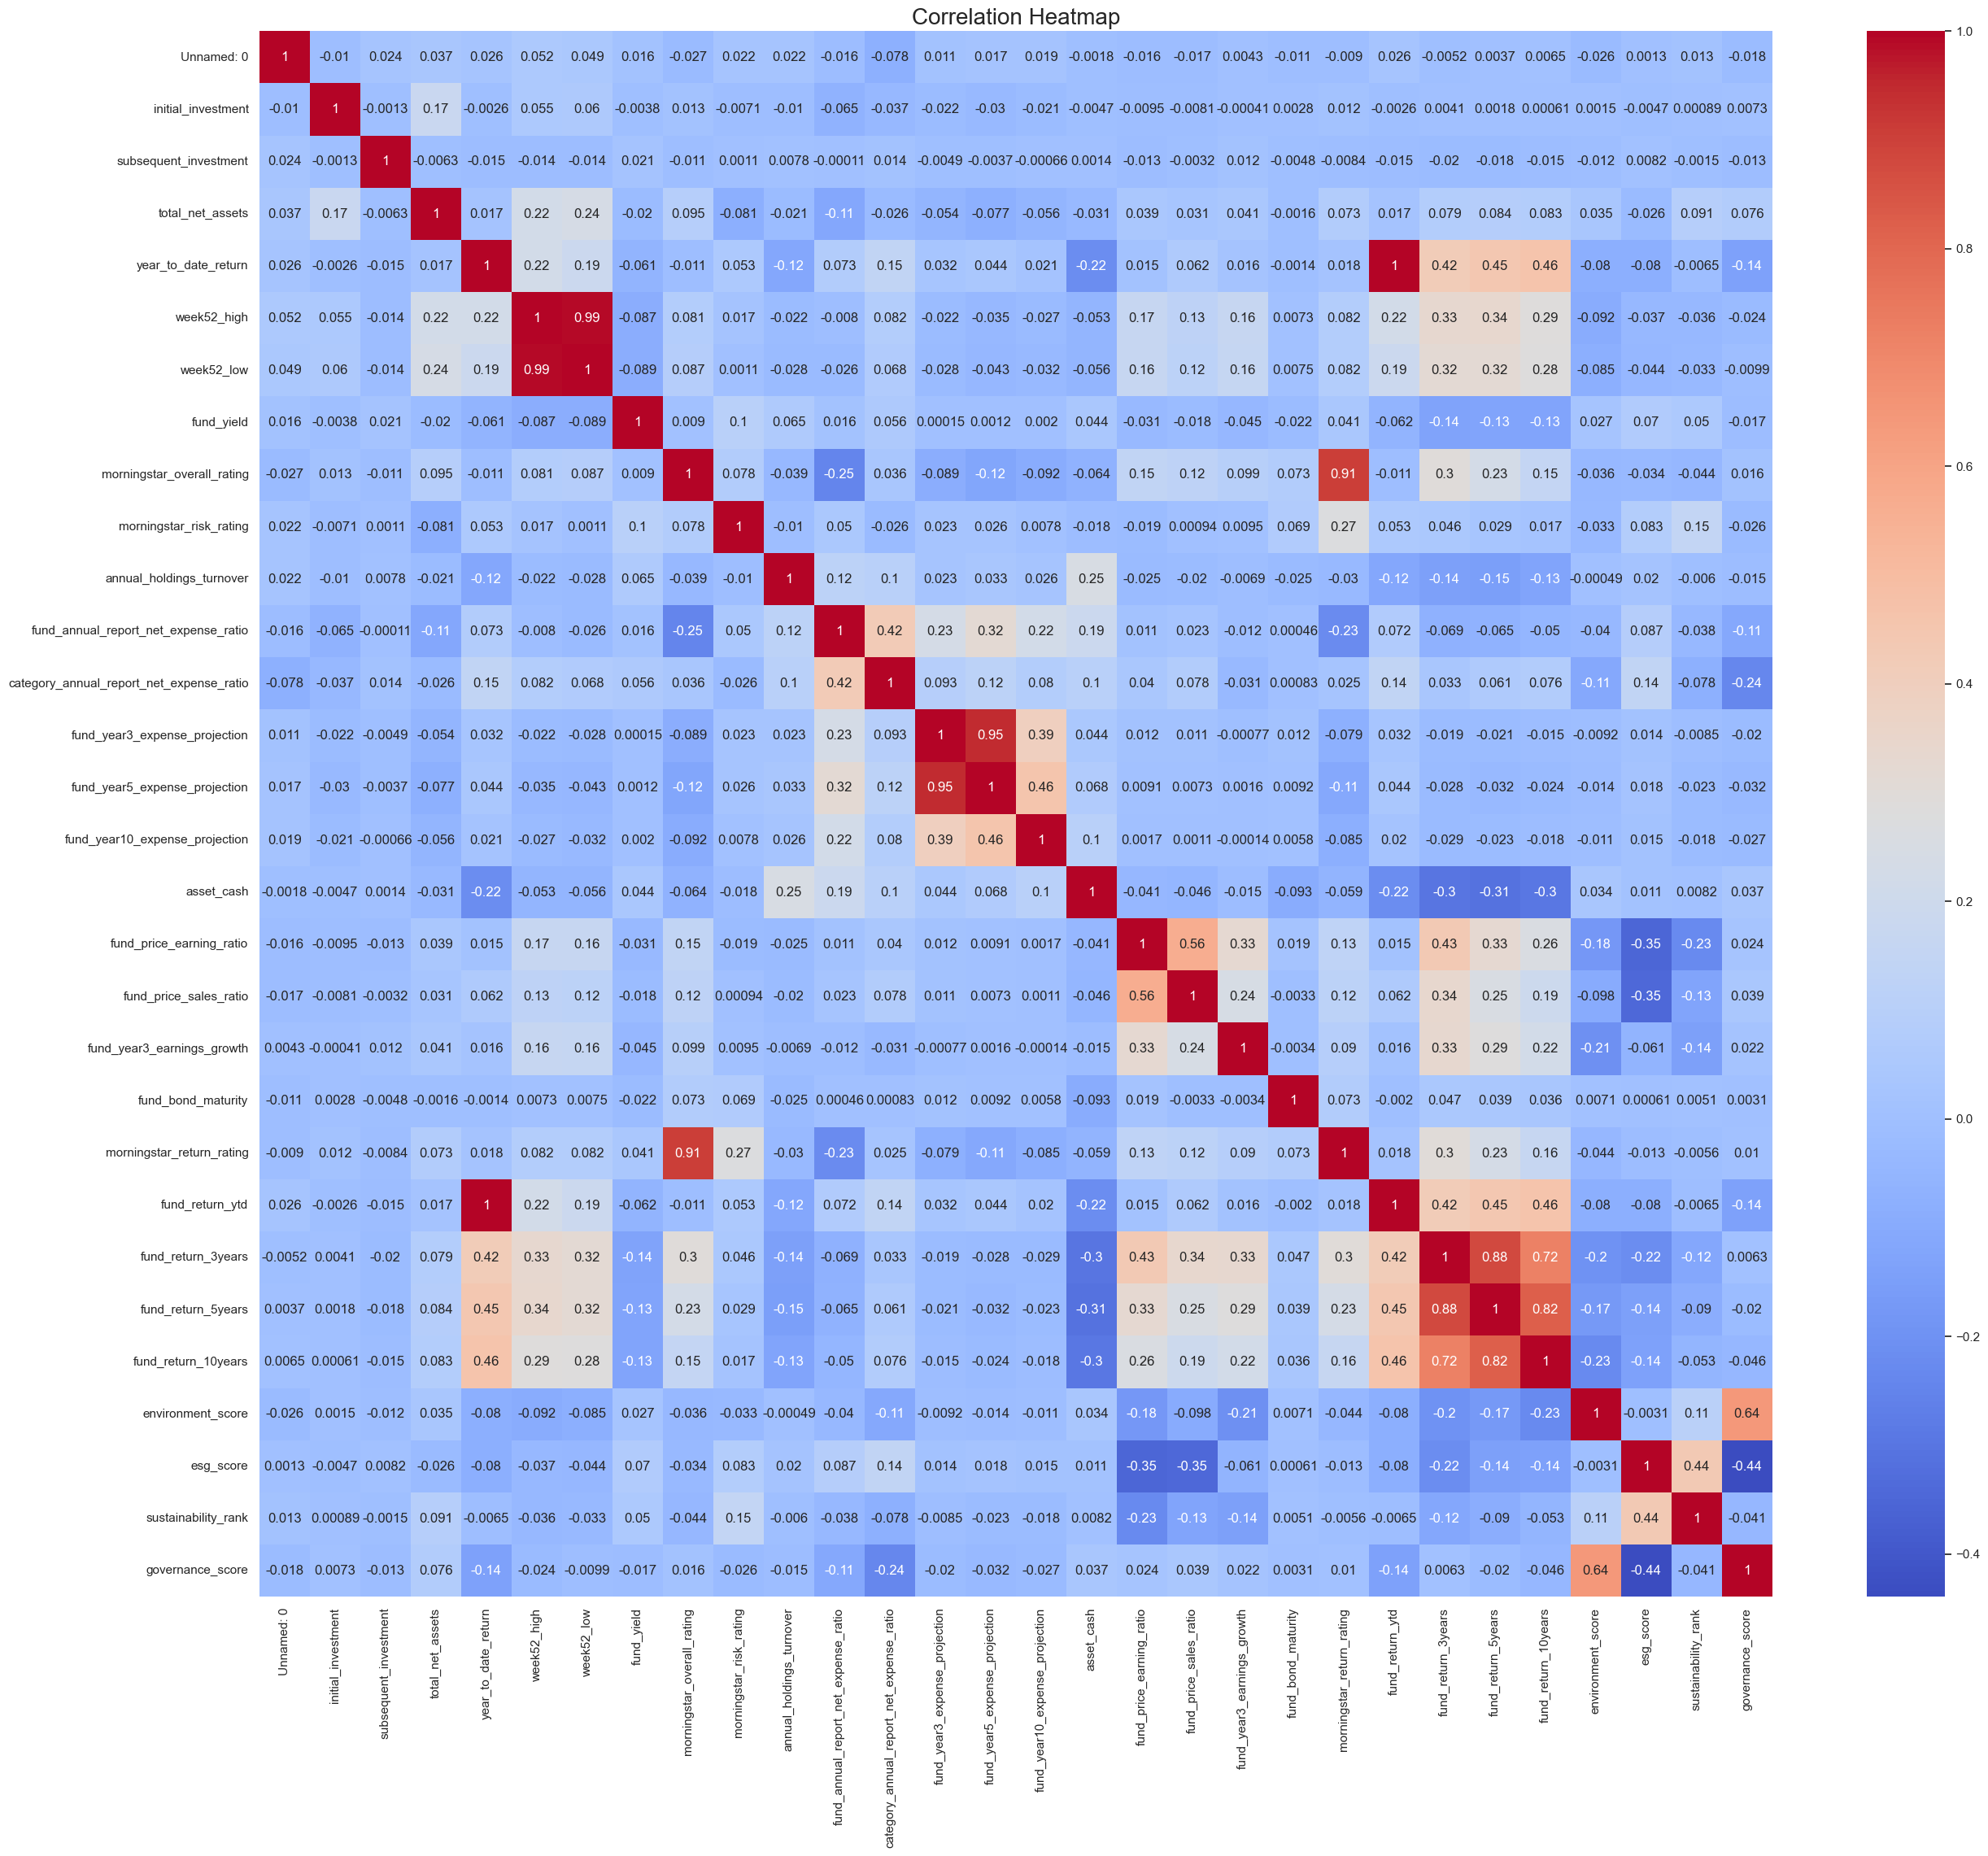

In [59]:
plt.figure(figsize=(30, 25))
correlation_matrix = df2.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap",fontsize=20)
plt.show()


<Figure size 6000x5000 with 0 Axes>

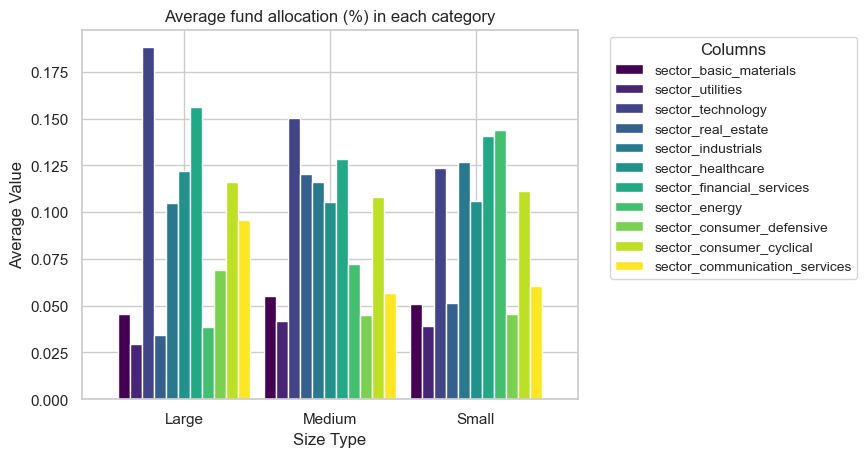

In [106]:
selected_columns = ['fund_sector_basic_materials', 'fund_sector_utilities', 'fund_sector_technology',
                     'fund_sector_real_estate', 'fund_sector_industrials', 'fund_sector_healthcare',
                     'fund_sector_financial_services', 'fund_sector_energy', 'fund_sector_consumer_defensive',
                     'fund_sector_consumer_cyclical', 'fund_sector_communication_services']

df_filtered = df[df['size_type'].notna()]

average_values = df_filtered.groupby('size_type')[selected_columns].mean()

average_values.columns = [col.replace('fund_', '') for col in average_values.columns]

plt.figure(figsize=(60, 50))

ax = average_values.plot(kind='bar', colormap='viridis', width=0.9)  # Adjust the width of the bars
plt.title('Average fund allocation (%) in each category', fontsize=12)
plt.xlabel('Size Type', fontsize=12)
plt.ylabel('Average Value', fontsize=12)
plt.xticks(rotation=0)

plt.legend(title='Columns', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

# # Add values on top of each bar
# for p in ax.patches:
#     ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
#                 ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.show()

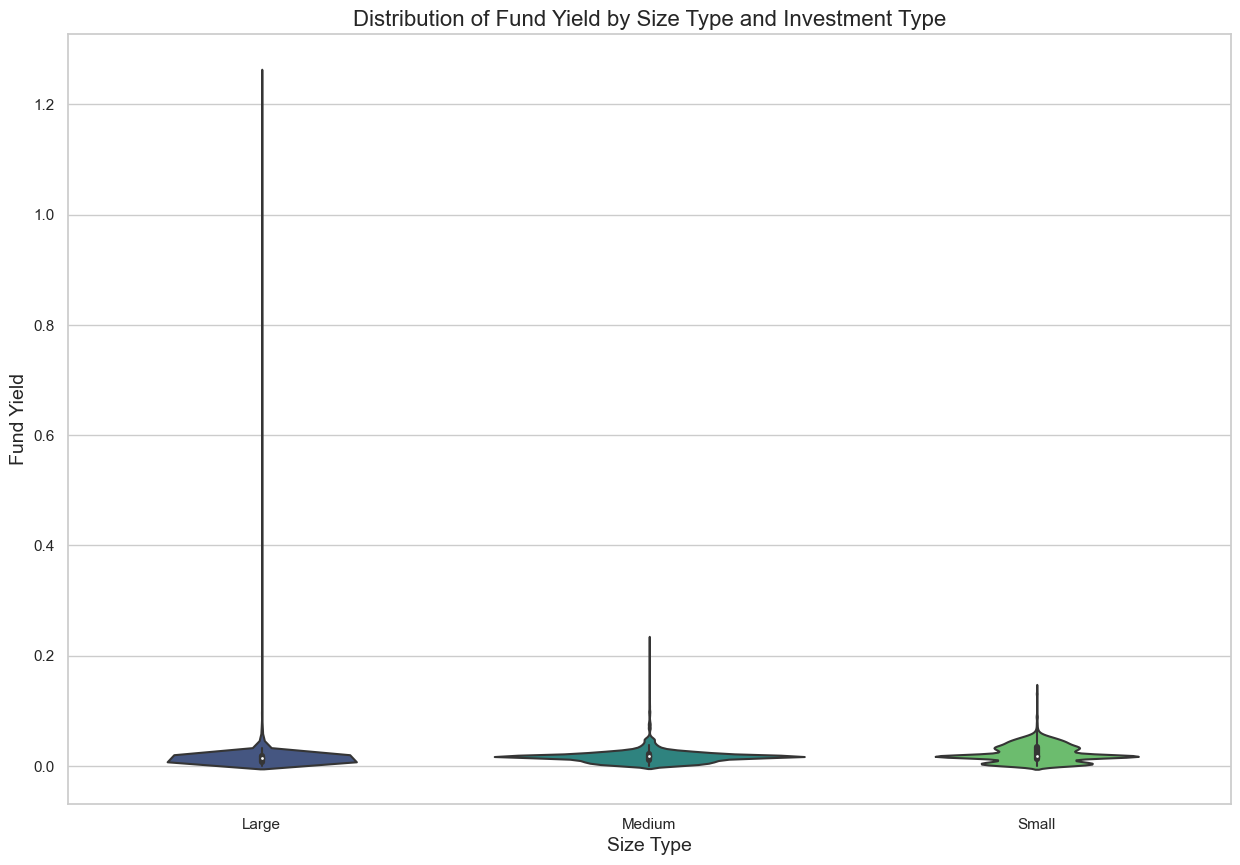

In [120]:

plt.figure(figsize=(15, 10))

# Plot the violin plot
sns.violinplot(x='size_type', y='fund_yield' ,data=df, palette='viridis', split=True)

plt.title('Distribution of Fund Yield by Size Type and Investment Type', fontsize=16)
plt.xlabel('Size Type', fontsize=14)
plt.ylabel('Fund Yield', fontsize=14)


plt.show()


In [6]:

#Random Forest -> fund_price_earning_ratio


X = df2.drop(['fund_price_earning_ratio'],axis=1)
y = df2['fund_price_earning_ratio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("For Random Forest : ")

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')



Mean Squared Error: 2.024959654063318
R-squared: 0.9509406215240864


In [7]:
#Extra Trees Regressor -> fund_price_earning_ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = ExtraTreesRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("For Extra Tree Regressor : ")
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.587166214981995
R-squared: 0.9615471903903178


In [8]:
#DecisionTreeRegressor -> fund_price_earning_ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the decision tree regressor model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("For Decision Tree Regressor : ")
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 4.9759866078179895
R-squared: 0.8794450991681899


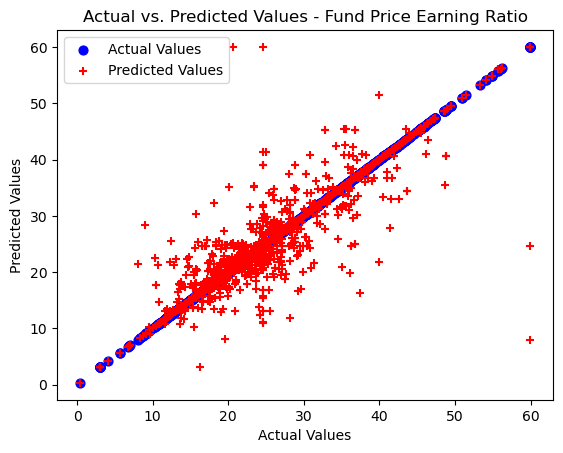

In [9]:


# Scatter plot for actual values
plt.scatter(y_test, y_test, color='blue', label='Actual Values', marker='o', s=40)

# Scatter plot for predicted values
plt.scatter(y_test, y_pred, color='red', label='Predicted Values', marker='+', s=30)

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values - Fund Price Earning Ratio")
plt.legend()
plt.show()


In [10]:
columns_to_add = ['fund_symbol', 'fund_short_name', 'investment_type', 'size_type', 'fund_category', 'fund_family', 'management_name', 'investment_strategy']

df3 = df2
df3[columns_to_add] = df[columns_to_add]


df3.head(10)

df4= df3.sort_values(by='fund_price_earning_ratio', ascending=False)

df4.to_csv("PriceEarningMLSorted.csv")

In [14]:
#Random Forest -> Year to Date Returns



X = df2.drop(['year_to_date_return'],axis=1)
y = df2['year_to_date_return']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("For Random Forest : ")
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')



Mean Squared Error: 4.371642870809334e-06
R-squared: 0.9993428814710024


In [15]:
#Extra Tree Regressor -> Year to Date Returns


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = ExtraTreesRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("For Extra Tree Regressor : ")
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 4.408069702307986e-06
R-squared: 0.999337406013231


In [16]:
#DecisionTreeRegressor -> Year to Date Returns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the decision tree regressor model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("For Decision Tree Regressor : ")
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 5.651310504569858e-06
R-squared: 0.9991505296851971


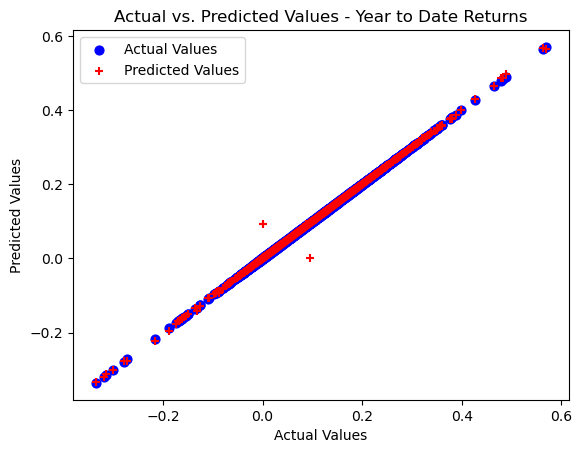

In [17]:

# Scatter plot for actual values
plt.scatter(y_test, y_test, color='blue', label='Actual Values', marker='o', s=40)

# Scatter plot for predicted values
plt.scatter(y_test, y_pred, color='red', label='Predicted Values', marker='+', s=30)

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values - Year to Date Returns")
plt.legend()
plt.show()


In [ ]:
columns_to_add = ['fund_symbol', 'fund_short_name', 'investment_type', 'size_type', 'fund_category', 'fund_family', 'management_name', 'investment_strategy']

df4 = df2
df4[columns_to_add] = df[columns_to_add]


df4.head(10)

df5= df4.sort_values(by='fund_price_earning_ratio', ascending=False)

#df5
df5.to_csv("YearToDateReturnsMLSorted.csv")

In [18]:

#Random Forest -> fund_return_5years


X = df2.drop(['fund_return_5years'],axis=1)
y = df2['fund_return_5years']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("For Random Forest : ")
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')



Mean Squared Error: 0.0002055200746461377
R-squared: 0.9071822781306205


In [19]:
#Extra Tree Regressor -> fund_return_5years


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = ExtraTreesRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("For Extra Tree Regressor : ")
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

For Extra Tree Regressor : 
Mean Squared Error: 0.00018836948813910574
R-squared: 0.9149278882421743


In [20]:
#DecisionTreeRegressor -> fund_return_5years

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the decision tree regressor model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("For Decision Tree Regressor : ")
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

For Decision Tree Regressor : 
Mean Squared Error: 0.0003689135462141956
R-squared: 0.8333899256055024


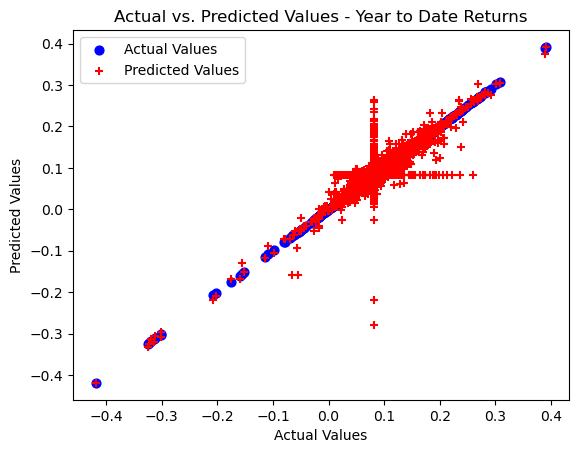

In [21]:

# Scatter plot for actual values
plt.scatter(y_test, y_test, color='blue', label='Actual Values', marker='o', s=40)

# Scatter plot for predicted values
plt.scatter(y_test, y_pred, color='red', label='Predicted Values', marker='+', s=30)

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values - Fund Return 5 Years")
plt.legend()
plt.show()


In [28]:
columns_to_add = ['fund_symbol', 'fund_short_name', 'investment_type', 'size_type', 'fund_category', 'fund_family', 'management_name', 'investment_strategy']

df5 = df2
df5[columns_to_add] = df[columns_to_add]


df5.head(10)

df6= df5.sort_values(by='fund_price_earning_ratio', ascending=False)

df6.head(10)
#df6.to_csv("Fund5YearMLSorted.csv")

In [125]:
topDF = df6.head(5)
topDF.head(5)
topDF.to_csv("topDFML.csv")

bottomDF = df6.tail(5)
bottomDF.to_csv("bottomDFML.csv")


total_rows = df6.shape[0]

# Extract exactly 5 mid rows
mid_start = (total_rows - 5) // 2
mid_end = mid_start + 5

# Select the mid rows
df7 = df6.iloc[mid_start:mid_end]


df7.head(5)
df7.to_csv("midDFML.csv")